#### Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it represent?

Ans.

R-squared (𝑅2) is a statistical measure used to evaluate the goodness of fit of a linear regression model. It represents the proportion of the variance in the dependent variable that is explained by the independent variables.  

R2 = 1: Perfect fit (model explains all variance).  
𝑅2 = 0: Model does not explain any variance.  
Higher 𝑅2 indicates a better fit, but a very high 𝑅2 might indicate overfitting.

R-squared: 0.9453


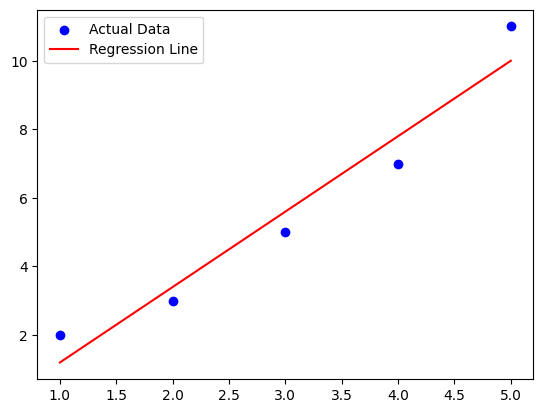

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 7, 11])

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

---

#### Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.

Ans.

**Adjusted R-squared:**  
- Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors (independent variables) in a regression model. It adjusts for the possibility that adding more predictors can artificially inflate the R-squared value, even if those predictors do not significantly improve the model.

**R-Squared (R2):**
- Measures: Proportion of variance explained.
- Effect of extra predictor: Always increases (or stays the same).  
- Penalization: No penalty for additional predictors.

**Adjusted R-Squared (R2):**
- Measures: Adjusted for number of predictors.
- Effect of extra predictor: Increases only if the predictor improves model quality.  
- Penalization: Penalizes excessive predictors to prevent overfitting.

---

#### Q3. When is it more appropriate to use adjusted R-squared?

Ans.

1.Comparing Models with Different Numbers of Predictors:
- If you are adding or removing variables from your regression model, adjusted R2 helps determine if the additional variables genuinely improve the model.
- Example: You test one model with 3 features and another with 5. If the adjusted R2 drops, the extra features are likely unnecessary.

2.Preventing Overfitting
- Regular R2 always increases (or stays the same) when you add more predictors, even if those predictors have little to no real impact.
- Adjusted R2 penalizes the inclusion of irrelevant predictors, ensuring that only useful variables improve the score.
- Example: If a dataset has 100 features but only 10 are useful, adjusted R2 will discourage including the remaining 90.

3.Dealing with Small Sample Sizes
- When working with small datasets, adding too many predictors can make R2 misleadingly high.
- Adjusted R2 corrects for this by factoring in the number of observations and predictors.
- Example: A dataset with 10 observations and 5 predictors may have a high R2, but adjusted R2 will reflect whether this complexity is justified.

---

#### Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics calculated, and what do they represent?

Ans.

1.Mean Absolute Error (MAE)
- Definition:
  - MAE is the average absolute difference between actual and predicted values. It measures how far off predictions are, without considering direction (overestimation vs underestimation).
- Formula =>
  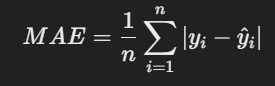
- Pros: Easy to interpret and robust to outliers.
- Cons: Does not penalize large errors more than small ones.

2.Mean Squared Error (MSE)
- Definition:
  - MSE is the average of the squared differences between actual and predicted values. Squaring the errors ensures that larger errors contribute more to the final metric.
- Formula =>
  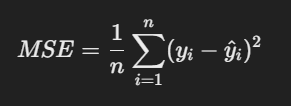
- Pros: Emphasizes large errors, useful when large deviations are more problematic.
- Cons: Sensitive to outliers because squaring amplifies large errors. 

3.Root Mean Squared Error (RMSE)
- Definition:
  - RMSE is the square root of MSE, bringing the error measurement back to the same unit as the original data. It gives a more interpretable error value.
- Formula =>
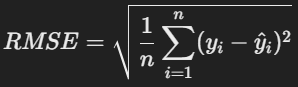
- Pros: Balances MSE’s emphasis on large errors while maintaining interpretability.
- Cons: Still sensitive to outliers but less so than MSE.

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mae = mean_absolute_error(y_true, y_pred)

mse = mean_squared_error(y_true, y_pred)

rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.5000
MSE: 0.3750
RMSE: 0.6124


---

#### Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in regression analysis.

Ans.

1.Root mean squared error (RMSE):
- Pros: Balances MSE’s emphasis on large errors while maintaining interpretability.
- Cons: Still sensitive to outliers but less so than MSE.

2.Mean Squared Error (MSE):
- Pros: Emphasizes large errors, useful when large deviations are more problematic.
- Cons: Sensitive to outliers because squaring amplifies large errors. 

3.Mean Absolute Error (MAE):
- Pros: Easy to interpret and robust to outliers.
- Cons: Does not penalize large errors more than small ones.

---

#### Q6. Explain the concept of Lasso regularization. How does it differ from Ridge regularization, and when is it more appropriate to use?

Ans.

**Lasso Regularization:**
- Lasso (Least Absolute Shrinkage and Selection Operator) is a type of regularization technique used in linear regression to prevent overfitting and enhance model generalization by penalizing large coefficients.

**Key Characteristics of Lasso:**  
1. L1 Regularization: Adds the absolute values of the coefficients as a penalty term.
2. Feature Selection: Lasso can shrink some coefficients exactly to zero, effectively removing irrelevant features.
3. Sparse Models: Ideal for high-dimensional datasets with many features, especially when only a subset is relevant.

**Ridge Regularization**  
- Ridge Regression uses L2 regularization, which adds the squared values of the coefficients as a penalty term:

**When to Use Lasso:**  
- Suspected many features are irrelevant or you want automatic feature selection.  
- Wanted a simpler, more interpretable model.
- Dealing with high-dimensional data (e.g., more features than observations).
- Willing to sacrifice a bit of prediction accuracy for model sparsity and interpretability.

---

#### Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an example to illustrate.

Ans.

Regularized linear models help prevent overfitting by penalizing large coefficients, thereby controlling the model's complexity. When a model is too complex (i.e., fits the training data too well), it captures noise and performs poorly on unseen data. Regularization discourages this by shrinking the coefficients, leading to a more generalizable model.

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+02, tolerance: 1.086e-01
  model = cd_fast.enet_coordinate_descent(


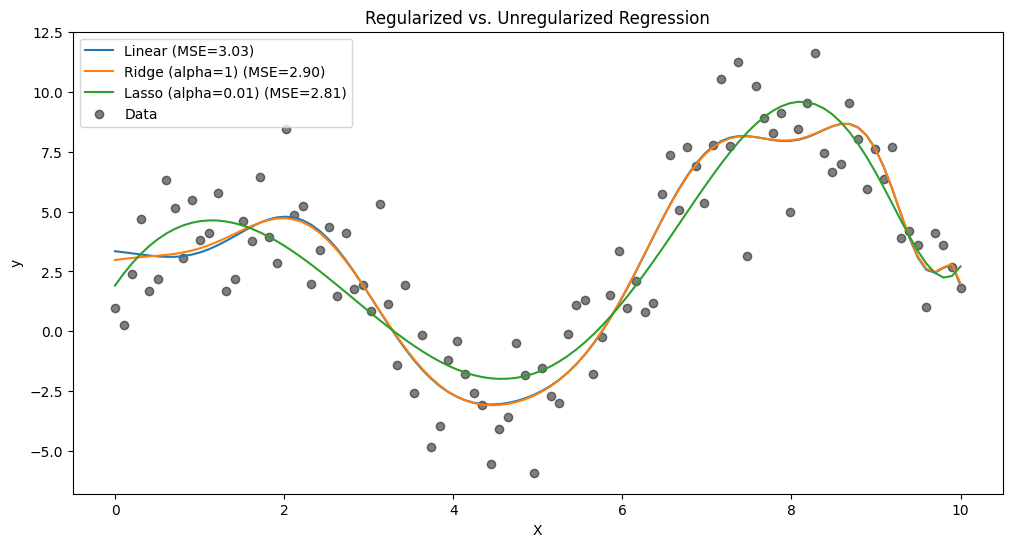

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 0.5 * X + np.sin(X) * 5 + np.random.randn(100) * 2

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

models = {
    "Linear": LinearRegression(),
    "Ridge (alpha=1)": Ridge(alpha=1),
    "Lasso (alpha=0.01)": Lasso(alpha=0.01, max_iter=10000)
}

plt.figure(figsize=(12, 6))
x_plot = np.linspace(0, 10, 100)
X_plot_poly = poly.transform(x_plot.reshape(-1, 1))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    plt.plot(x_plot, model.predict(X_plot_poly), label=f"{name} (MSE={mse:.2f})")

plt.scatter(X, y, color='black', alpha=0.5, label="Data")
plt.title("Regularized vs. Unregularized Regression")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

---

#### Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best choice for regression analysis. 

Ans.

Regularized linear models like Ridge, Lasso, and Elastic Net are powerful tools for regression, especially in high-dimensional or multicollinear datasets. However, they aren't always the best choice for regression analysis. Here are their key limitations and caveats:

**Assumption of Linearity**  
- Regularized linear models assume a linear relationship between features and the target.
- If the true relationship is nonlinear, even strong regularization won't help—they'll still underfit.
- Example: Predicting housing prices where price depends nonlinearly on size, location, and amenities.

**Sensitive to Feature Scaling**  
- Regularization techniques (especially Ridge and Lasso) are sensitive to the scale of input features.
- Unscaled data can give disproportionate penalties to features with large numeric ranges.
- Solution: Always scale data using StandardScaler or MinMaxScaler.

**Lasso Limitations with Correlated Features**  
- When features are highly correlated, Lasso tends to pick one and ignore others arbitrarily.
- This can lead to instability in feature selection.
- Elastic Net is often better when many features are correlated—it blends L1 and L2 penalties.

**Ridge Doesn’t Perform Feature Selection**  
- Ridge shrinks coefficients but never sets them exactly to zero.
- If feature selection or sparsity is a goal, Ridge is not ideal.

**Limited Interpretability in High Dimensions**
- While simpler than tree-based models, in high-dimensional cases even Lasso/Ridge can have coefficients that are hard to interpret, especially when multicollinearity is present.

---

#### Q9. You are comparing the performance of two regression models using different evaluation metrics. Model A has an RMSE of 10, while Model B has an MAE of 8. Which model would you choose as the better performer, and why? Are there any limitations to your choice of metric?

---

#### Q10. You are comparing the performance of two regularized linear models using different types of regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the better performer, and why? Are there any trade-offs or limitations to your choice of regularization method?

Ans.

To choose the better performer between:

Model A: Ridge regularization with α=0.1  
Model B: Lasso regularization with α=0.5  
Need to go beyond just knowing the regularization method and parameter. Let’s break it down:

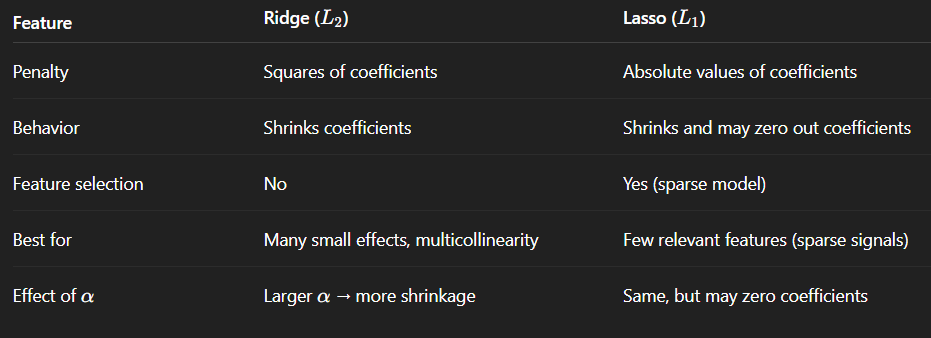

Why Can’t Decide Just Based on α and Method:
 
**Regularization Strength is Relative:**  
- α=0.5 in Lasso doesn’t directly compare to α=0.1 in Ridge.
- Each model responds differently to the same α value.

**Different Goals:**
- Ridge aims to reduce variance in models with many features.
- Lasso aims to perform feature selection and enforce sparsity.

**Missing Evaluation Metrics:**
- Without knowing test set performance (e.g., RMSE, MAE), we can’t say which model generalizes better.

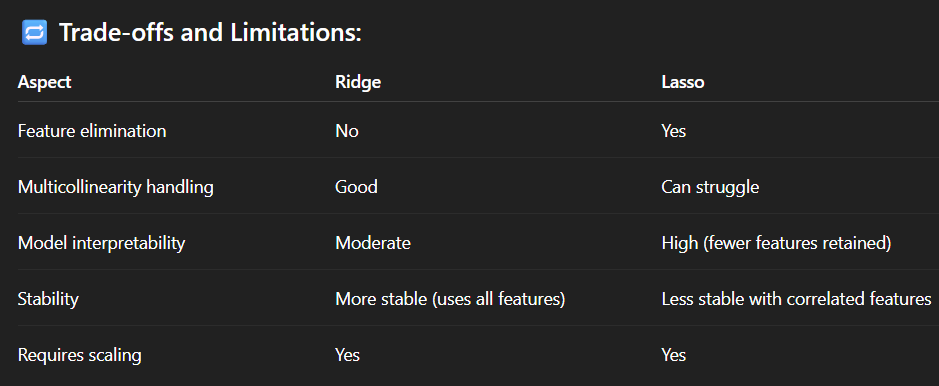